In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

# 1. Project Introduction
As a student in the Data Science and Machine Learning program, I am actively preparing for my future career. However, like many students who are planning to enter the job market, I face several important questions:

- <strong>What types of data-related jobs offer competitive salaries?

- <strong>Which industries provide better employee experience or company culture?

- <strong>How does location affect salary expectations or job opportunities?

To address these questions and to help others who may feel the same uncertainty about career planning, I chose to explore a dataset related to data science jobs, salaries, company ratings, and locations from my COMP-2040 Modelo3(https://learn.rrc.ca/d2l/le/content/645918/viewContent/10851187/View).

# 2. My goal
To build a complete and meaningful report, I structured my analysis around three connected themes:

- <strong>Salary exploration</strong> – understanding which job titles offer higher salaries and what salary ranges job seekers can expect.

- <strong>Industry/company rating exploration</strong> – identifying which industries or employers are better rated by their employees.

- <strong>Geographical differences</strong> – exploring how salaries vary across regions and what locations may offer better opportunities.

Together, these pieces form a coherent narrative about how a new data science graduate can evaluate job opportunities using data

In [165]:
df = pd.read_csv('./datasets/Uncleaned_DS_jobs.csv')
df.shape

(672, 15)

In [4]:
df.isnull().sum()

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.head(5)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


# 3. Data Cleaning
Before conducting any analysis, I performed several data cleaning steps to ensure accuracy and reliability.
These included:
- remove index
- Cleaning job titles and converting categorical fields
- Standardizing salary fields
- Fixing missing values in other columns, especially in locations and company ratings
- Creating new calculated fields (e.g. job level and salary ranges)

This thorough cleaning process ensures that the results I present later are trustworthy and meaningful.

### step1: remove index
The index column is not necessary to do analysis.

In [9]:
df.drop(columns=['index'], inplace=True)

In [10]:
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1


## step2:  Cleaning job titles and converting categorical fields
- clean job titles: remove letter, hyphen, underscore and spaces
- categories: Data Scientist, Machine Learning Engineer, ML Scientist, Data Engineer, Data Analyst, Business Intelligence Analyst, Analytics Manager, Software Engineer (Data), Research Scientist, Other
- create new column - level, only contain the job title level

In [12]:
df['Job Title'].unique()

array(['Sr Data Scientist', 'Data Scientist',
       'Data Scientist / Machine Learning Expert',
       'Staff Data Scientist - Analytics',
       'Data Scientist - Statistics, Early Career', 'Data Modeler',
       'Experienced Data Scientist', 'Data Scientist - Contract',
       'Data Analyst II', 'Medical Lab Scientist',
       'Data Scientist/Machine Learning', 'Human Factors Scientist',
       'Business Intelligence Analyst I- Data Insights',
       'Data Scientist - Risk', 'Data Scientist-Human Resources',
       'Senior Research Statistician- Data Scientist', 'Data Engineer',
       'Associate Data Scientist', 'Business Intelligence Analyst',
       'Senior Analyst/Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Data Analyst I',
       'Scientist - Molecular Biology',
       'Computational Scientist, Machine Learning',
       'Senior Data Scientist', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Data Analytics Engineer',
       'Product Data Scient

In [13]:
# df['Title'] = df['Job Title'].str.extract(r'[^\w\s-]\s+', expand = False).str.strip()
def clean_title(title):
    title = title.lower()
    title = re.sub(r'[^\w\s-]', ' ', title)
    title = re.sub(r'\s+', ' ', title)
    return title.strip()

def categorize_title(cleaned_title):

    t = cleaned_title

    if "data scientist" in t:
        return "Data Scientist"
    if "machine learning engineer" in t or "ml engineer" in t:
        return "Machine Learning Engineer"
    if "machine learning scientist" in t or "ml scientist" in t:
        return "ML Scientist"
    if "data engineer" in t:
        return "Data Engineer"
    if "data analyst" in t or "business data analyst" in t or "bi analyst" in t:
        return "Data Analyst"
    if "business intelligence" in t:
        return "Business Intelligence Analyst"
    if "analytics manager" in t:
        return "Analytics Manager"
    if "software engineer" in t and "data" in t:
        return "Software Engineer (Data)"
    if "research scientist" in t:
        return "Research Scientist"
    if "scientist" in t:
        return "Scientist (Other)"
    return "Other"


def extract_level(title):
    if any(x in title for x in ["sr", "senior", "lead", "principal", "staff"]):
        return "Senior"
    if any(x in title for x in ["jr", "junior", "associate"]):
        return "Junior"
    return "Mid"

In [14]:
df['Title'] = df['Job Title'].apply(clean_title) # add Title column
df['Job_category'] = df['Title'].apply(categorize_title)
df['level'] = df['Title'].apply(extract_level) # add Level column
df.drop(columns=['Job Title'],inplace=True)
# df.head()

#### Plot the job category distribution. We can see that the data is unbalanced, so I will prefer to use the average salary calculated by job category distribution next.

Text(0.5, 1.0, 'Data Science Job Categories Distribution')

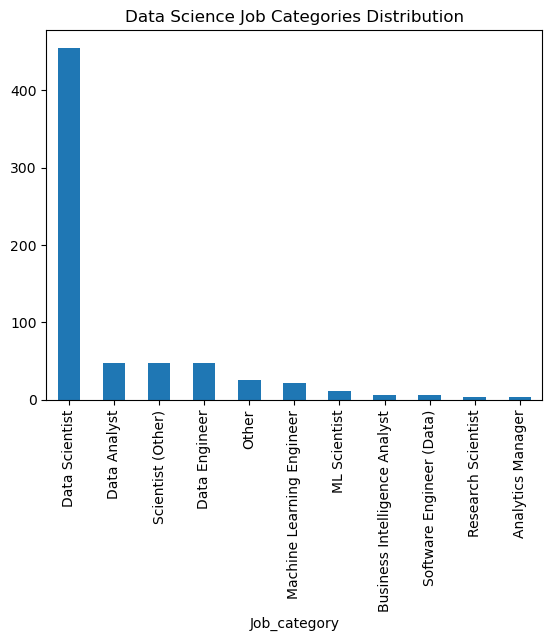

In [16]:
df['Job_category'].value_counts().plot(kind='bar')
plt.title('Data Science Job Categories Distribution')

## step3: Standardizing salary fields
- clean salary: remove all in braket, replace 'K' to '1000'
- create new column - min_salary, max_salary, Avg_salary, to help next analysis

In [18]:
df['Salary Estimate'].unique()

array(['$137K-$171K (Glassdoor est.)', '$75K-$131K (Glassdoor est.)',
       '$79K-$131K (Glassdoor est.)', '$99K-$132K (Glassdoor est.)',
       '$90K-$109K (Glassdoor est.)', '$101K-$165K (Glassdoor est.)',
       '$56K-$97K (Glassdoor est.)', '$79K-$106K (Glassdoor est.)',
       '$71K-$123K (Glassdoor est.)', '$90K-$124K (Glassdoor est.)',
       '$91K-$150K (Glassdoor est.)', '$141K-$225K (Glassdoor est.)',
       '$145K-$225K(Employer est.)', '$79K-$147K (Glassdoor est.)',
       '$122K-$146K (Glassdoor est.)', '$112K-$116K (Glassdoor est.)',
       '$110K-$163K (Glassdoor est.)', '$124K-$198K (Glassdoor est.)',
       '$79K-$133K (Glassdoor est.)', '$69K-$116K (Glassdoor est.)',
       '$31K-$56K (Glassdoor est.)', '$95K-$119K (Glassdoor est.)',
       '$212K-$331K (Glassdoor est.)', '$66K-$112K (Glassdoor est.)',
       '$128K-$201K (Glassdoor est.)', '$138K-$158K (Glassdoor est.)',
       '$80K-$132K (Glassdoor est.)', '$87K-$141K (Glassdoor est.)',
       '$92K-$155K (Glassdo

In [19]:
df['Salary Estimate'] = df['Salary Estimate'].str.extract(r'^(.*?)\s*\(', expand= False)
df['Salary Estimate'] = df['Salary Estimate'].str.replace('$','').str.replace('K','000')

In [20]:
df['min_salary'] = pd.to_numeric(df['Salary Estimate'].str.split('-').str[0])

In [21]:
df['max_salary'] = pd.to_numeric(df['Salary Estimate'].str.split('-').str[1])

In [22]:
df['Avg_salary'] = (df['min_salary'] + df['max_salary'])/2

In [23]:
df.head()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Title,Job_category,level,min_salary,max_salary,Avg_salary
0,137000-171000,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",sr data scientist,Data Scientist,Senior,137000,171000,154000.0
1,137000-171000,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,data scientist,Data Scientist,Mid,137000,171000,154000.0
2,137000-171000,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,data scientist,Data Scientist,Mid,137000,171000,154000.0
3,137000-171000,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",data scientist,Data Scientist,Mid,137000,171000,154000.0
4,137000-171000,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,Data Scientist,Mid,137000,171000,154000.0


## step4: clean column - Job description

In [25]:
df['Job Description'] = df['Job Description'].str.replace(r'\n+', ' ', regex = True).str.strip()

In [26]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stopwords = set(ENGLISH_STOP_WORDS)

TAG_RE = re.compile(r'<.*?>')
URL_RE = re.compile(r'https?://\S+|www\.\S+')
MENTION_HASH_RE = re.compile(r'[@#]\w+')
NON_ALPHA_RE = re.compile(r'[^a-z\s]+')

def clean_text(text: str) -> str:
    if not isinstance(text, str):
        text = str(text)
    t = text.lower()
    t = TAG_RE.sub(' ', t)          # remove HTML tags
    t = URL_RE.sub(' ', t)          # remove URLs
    t = MENTION_HASH_RE.sub(' ', t) # remove @mentions and #hashtags
    t = NON_ALPHA_RE.sub(' ', t)    # keep only letters and spaces
    t = re.sub(r'\s+', ' ', t).strip()
    # stopword removal
    words = [w for w in t.split() if w not in stopwords]
    return ' '.join(words)

In [27]:
df['Job Description'] = df['Job Description'].map(clean_text)

In [28]:
df.head()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Title,Job_category,level,min_salary,max_salary,Avg_salary
0,137000-171000,description senior data scientist responsible ...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",sr data scientist,Data Scientist,Senior,137000,171000,154000.0
1,137000-171000,secure nation ignite future join information t...,4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,data scientist,Data Scientist,Mid,137000,171000,154000.0
2,137000-171000,overview analysis group largest international ...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,data scientist,Data Scientist,Mid,137000,171000,154000.0
3,137000-171000,job description passion data machine learning ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",data scientist,Data Scientist,Mid,137000,171000,154000.0
4,137000-171000,data scientist affinity solutions marketing cl...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,Data Scientist,Mid,137000,171000,154000.0


## step5: Fixing missing values in other columns, especially in locations and company ratings
- clean company name: remove \n and numbers
- clean others: replace -1 with unknown by itself data type, include location and ratings

In [30]:
df['Company Name'] = df['Company Name'].str.extract(r'^([^\n]+?)(?:\n\d|$)', expand = False) # remove \n3.2

In [31]:
df.head()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Title,Job_category,level,min_salary,max_salary,Avg_salary
0,137000-171000,description senior data scientist responsible ...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",sr data scientist,Data Scientist,Senior,137000,171000,154000.0
1,137000-171000,secure nation ignite future join information t...,4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,data scientist,Data Scientist,Mid,137000,171000,154000.0
2,137000-171000,overview analysis group largest international ...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,data scientist,Data Scientist,Mid,137000,171000,154000.0
3,137000-171000,job description passion data machine learning ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",data scientist,Data Scientist,Mid,137000,171000,154000.0
4,137000-171000,data scientist affinity solutions marketing cl...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,Data Scientist,Mid,137000,171000,154000.0


In [33]:
df['Rating'].unique()

array([ 3.1,  4.2,  3.8,  3.5,  2.9,  3.9,  4.4,  3.6,  4.5,  4.7,  3.7,
        3.4,  4.1,  3.2,  4.3,  2.8,  5. ,  4.8,  3.3,  2.7,  2.2,  2.6,
        4. ,  2.5,  4.9,  2.4, -1. ,  2.3,  4.6,  3. ,  2.1,  2. ])

In [34]:
df['Location'].unique()

array(['New York, NY', 'Chantilly, VA', 'Boston, MA', 'Newton, MA',
       'Santa Barbara, CA', 'Cambridge, MA', 'Bedford, MA',
       'San Diego, CA', 'Chicago, IL', 'Herndon, VA', 'Saint Louis, MO',
       'Richland, WA', 'Northbrook, IL', 'Washington, DC', 'Remote',
       'Memphis, TN', 'Plano, TX', 'West Grove, PA', 'Phoenix, AZ',
       'Appleton, WI', 'Atlanta, GA', 'Orlando, FL', 'Lexington, MA',
       'McLean, VA', 'San Francisco, CA', 'Sheboygan, WI',
       'United States', 'Bothell, WA', 'Lincoln, NE', 'Overland Park, KS',
       'Santa Monica, CA', 'Portsmouth, NH', 'Ewing, NJ',
       'South San Francisco, CA', 'Palo Alto, CA', 'Bellevue, WA',
       'New Orleans, LA', 'Akron, OH', 'Fort Wayne, IN', 'Woburn, MA',
       'Carson, CA', 'Coral Gables, FL', 'Santa Clara, CA',
       'Brisbane, CA', 'Winter Park, FL', 'Redwood City, CA',
       'Peoria, IL', 'Ipswich, MA', 'Carmel, IN', 'Emeryville, CA',
       'Gaithersburg, MD', 'Longmont, CO', 'Austin, TX', 'Yakima, WA',
 

In [35]:
df['Headquarters'].unique()

array(['New York, NY', 'Herndon, VA', 'Boston, MA',
       'Bad Ragaz, Switzerland', 'Santa Barbara, CA',
       'Basel, Switzerland', 'Bedford, MA', 'Mountain View, CA',
       'Chicago, IL', 'Mc Lean, VA', 'Saint Louis, MO', 'Richland, WA',
       'Northbrook, IL', 'Princeton, NJ', 'Mays Landing, NJ',
       'Washington, DC', 'Memphis, TN', 'Tempe, AZ', 'Reading, PA',
       'San Francisco, CA', 'Menlo Park, CA', 'Atlanta, GA',
       'Orlando, FL', 'Lexington, MA', 'Falls Church, VA',
       'Sheboygan, WI', 'Seattle, WA', 'Bellevue, WA', 'Lincoln, NE',
       'Chantilly, VA', 'Santa Monica, CA', 'Ewing, NJ',
       'South San Francisco, CA', 'Palo Alto, CA', 'Singapore, Singapore',
       'Cambridge, MA', 'OSAKA, Japan', 'Santa Clara, CA', 'Vienna, VA',
       'New Orleans, LA', 'Akron, OH', 'Zurich, Switzerland',
       'Woburn, MA', 'Carson, CA', 'Coral Gables, FL', 'San Ramon, CA',
       'Brisbane, CA', 'Winter Park, FL', 'San Rafael, CA',
       'Deerfield, IL', 'Ipswich, MA',

In [36]:
df['Size'].unique()

array(['1001 to 5000 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
       '201 to 500 employees', '1 to 50 employees', '-1', 'Unknown'],
      dtype=object)

In [37]:
df['Founded'].unique()

array([1993, 1968, 1981, 2000, 1998, 2010, 1996, 1990, 1983, 2014, 2012,
       2016, 1965, 1973, 1986, 1997, 2015, 1945, 1988, 2017, 2011, 1967,
       1860, 1992, 2003, 1951, 2005, 2019, 1925, 2008, 1999, 1978, 1966,
       1912, 1958, 2013, 1849, 1781, 1926, 2006, 1994, 1863, 1995,   -1,
       1982, 1974, 2001, 1985, 1913, 1971, 1911, 2009, 1959, 2007, 1939,
       2002, 1961, 1963, 1969, 1946, 1957, 1953, 1948, 1850, 1851, 2004,
       1976, 1918, 1954, 1947, 1955, 2018, 1937, 1917, 1935, 1929, 1820,
       1952, 1932, 1894, 1960, 1788, 1830, 1984, 1933, 1880, 1887, 1970,
       1942, 1980, 1989, 1908, 1853, 1875, 1914, 1898, 1956, 1977, 1987,
       1896, 1972, 1949, 1962], dtype=int64)

In [38]:
df['Type of ownership'].unique()

array(['Nonprofit Organization', 'Company - Public',
       'Private Practice / Firm', 'Company - Private', 'Government',
       'Subsidiary or Business Segment', 'Other Organization', '-1',
       'Unknown', 'Hospital', 'Self-employed', 'College / University',
       'Contract'], dtype=object)

In [39]:
df['Sector'].unique()

array(['Insurance', 'Business Services', 'Manufacturing',
       'Information Technology', 'Biotech & Pharmaceuticals', 'Retail',
       'Oil, Gas, Energy & Utilities', 'Government', 'Health Care',
       'Finance', 'Aerospace & Defense', '-1',
       'Transportation & Logistics', 'Media', 'Telecommunications',
       'Real Estate', 'Travel & Tourism', 'Agriculture & Forestry',
       'Education', 'Accounting & Legal', 'Non-Profit',
       'Construction, Repair & Maintenance', 'Consumer Services'],
      dtype=object)

In [40]:
df['Revenue'].unique()

array(['Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$100 to $500 million (USD)', '$10+ billion (USD)',
       '$2 to $5 billion (USD)', '$500 million to $1 billion (USD)',
       '$5 to $10 billion (USD)', '$10 to $25 million (USD)',
       '$25 to $50 million (USD)', '$50 to $100 million (USD)',
       '$1 to $5 million (USD)', '$5 to $10 million (USD)',
       'Less than $1 million (USD)', '-1'], dtype=object)

In [41]:
df['Industry'].unique()

array(['Insurance Carriers', 'Research & Development', 'Consulting',
       'Electrical & Electronic Manufacturing', 'Advertising & Marketing',
       'Computer Hardware & Software', 'Biotech & Pharmaceuticals',
       'Consumer Electronics & Appliances Stores',
       'Enterprise Software & Network Solutions', 'IT Services', 'Energy',
       'Chemical Manufacturing', 'Federal Agencies', 'Internet',
       'Health Care Services & Hospitals',
       'Investment Banking & Asset Management', 'Aerospace & Defense',
       'Utilities', '-1', 'Express Delivery Services',
       'Staffing & Outsourcing', 'Insurance Agencies & Brokerages',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Food & Beverage Manufacturing', 'Banks & Credit Unions',
       'Video Games', 'Shipping', 'Telecommunications Services',
       'Lending', 'Cable, Internet & Telephone Providers', 'Real Estate',
       'Venture Capital & Private Equity', 'Miscellaneous Manufacturing',
       'Oil 

In [42]:
df['Competitors'].unique()

array(['EmblemHealth, UnitedHealth Group, Aetna', '-1',
       'MKS Instruments, Pfeiffer Vacuum, Agilent Technologies',
       'Commerce Signals, Cardlytics, Yodlee',
       'Square, PayPal, H&R Block',
       'Leidos, CACI International, Booz Allen Hamilton',
       'Slalom, Daugherty Business Solutions',
       'Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory',
       'CDW, PCM, SHI International',
       'Crossix Solutions Inc., AppNexus, The Trade Desk',
       'Northwestern Mutual', 'Puppet, Ansible, SaltStack',
       'Enlivant, Sunrise Senior Living, Brookdale Senior Living',
       'TrueCar, Cars.com, Kelley Blue Book',
       'Travelers, Allstate, State Farm', 'Novartis, Baxter, Pfizer',
       'Skyhigh Networks, Zscaler, NortonLifeLock',
       'Facebook, Google, Pinterest', 'DoorDash, Uber, Grubhub',
       'Munich Re, Hannover RE, SCOR', "IMAGE Skincare, Aveda, Kiehl's",
       'Luxoft, EPAM, Capgemini Invent', 'Sequenom',
     

In [43]:
df['Rating'] = df['Rating'].replace(-1,'Unknown')
df['Size'] = df['Size'].str.replace('-1','Unknown')
df['Founded'] = df['Founded'].replace(-1,'Unknown')
df['Type of ownership'] = df['Type of ownership'].str.replace('-1','Unknown')
df['Revenue'] = df['Revenue'].str.replace('-1','Unknown')
df['Industry'] = df['Industry'].str.replace('-1','Unknown')
df['Competitors'] = df['Competitors'].str.replace('-1','Unknown')
df.head()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Title,Job_category,level,min_salary,max_salary,Avg_salary
0,137000-171000,description senior data scientist responsible ...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",sr data scientist,Data Scientist,Senior,137000,171000,154000.0
1,137000-171000,secure nation ignite future join information t...,4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),Unknown,data scientist,Data Scientist,Mid,137000,171000,154000.0
2,137000-171000,overview analysis group largest international ...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),Unknown,data scientist,Data Scientist,Mid,137000,171000,154000.0
3,137000-171000,job description passion data machine learning ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",data scientist,Data Scientist,Mid,137000,171000,154000.0
4,137000-171000,data scientist affinity solutions marketing cl...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,Data Scientist,Mid,137000,171000,154000.0


In [44]:
# df.to_csv("clean_job.csv", index= False)

# 4. Exploration Data Analysis: 

## Part 1 - Salary Patterns:
The first question I explored is:
<strong>“Which data-related job titles tend to offer higher salaries?”

This is a natural starting point because salary is often the most important consideration for new graduates.

Through visualizations and summary statistics, I identified salary differences across job titles such as Data Scientist, Data Analyst, Machine Learning Engineer, and AI Engineer.

This provides job seekers with a clear understanding of the potential financial landscape in different roles.

C:\Users\sundy\AppData\Local\Temp\ipykernel_55648\2683099092.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




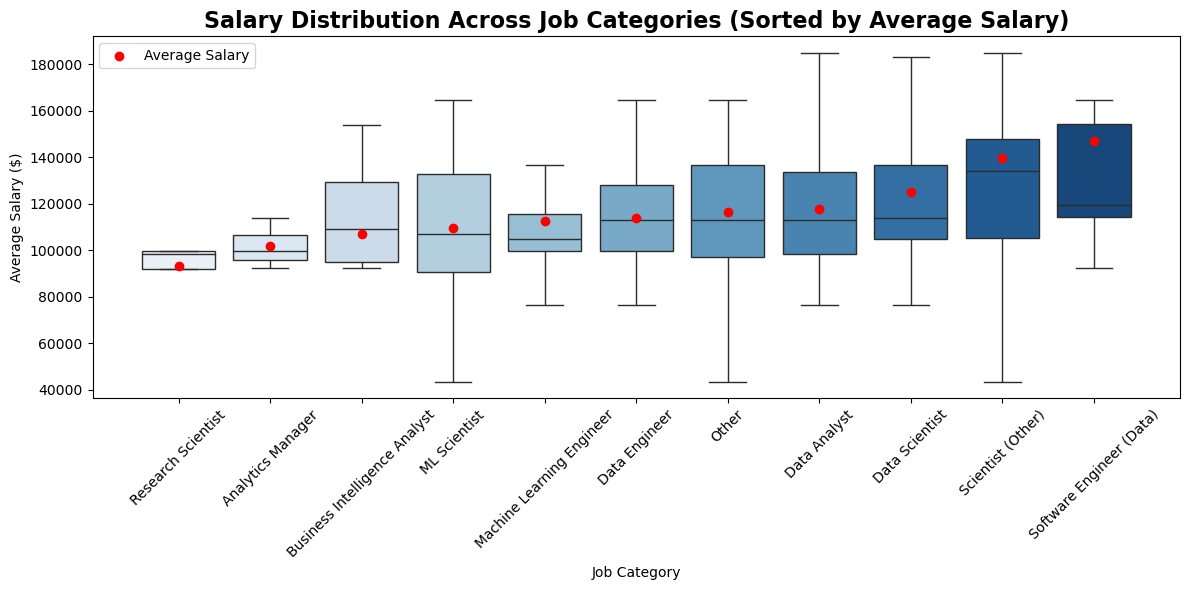

In [142]:
order = df.groupby("Job_category")["Avg_salary"].mean().sort_values().index

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x="Job_category",
    y="Avg_salary",
    order=order,
    palette="Blues",
    showfliers=False
)

means = df.groupby("Job_category")["Avg_salary"].mean().loc[order]

plt.scatter(range(len(order)), means, color="red", label="Average Salary", zorder=10)

plt.title("Salary Distribution Across Job Categories (Sorted by Average Salary)", fontsize=16, fontweight="bold")
plt.xlabel("Job Category")
plt.ylabel("Average Salary ($)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### conclusion part1: 
- <strong>Significant salary differences exist between different job roles.

The chart shows that median salaries for technical roles such as Data Scientist, Machine Learning Engineer, and Software Engineer (Data) are generally high, while median salaries for roles like Data Analyst and Business Intelligence Analyst are relatively low.

- <strong>Salaries for some roles fluctuate greatly.

For example, the box plots for Scientist (Other) and ML Scientist

- <strong>Salaries for roles like Analytics Manager and Research Scientist are more concentrated, suggesting that these positions have more stable salaries within the industry.

- <strong>The data contains some obvious high-salary outliers, which may represent:

- - A few high-paying companies/industries

- - High-cost states

## Part 2 — Industry & Company Ratings

After understanding salary patterns, salary alone is not enough.
A well-paying job in a toxic environment may not be desirable.

So the next question I asked was:
<strong>“Which industries or companies have higher employee ratings?”

By analyzing company ratings and industry categories, I highlight which sectors tend to provide better workplace experiences.
This gives viewers a more complete picture—helping them balance <strong>salary vs work culture.

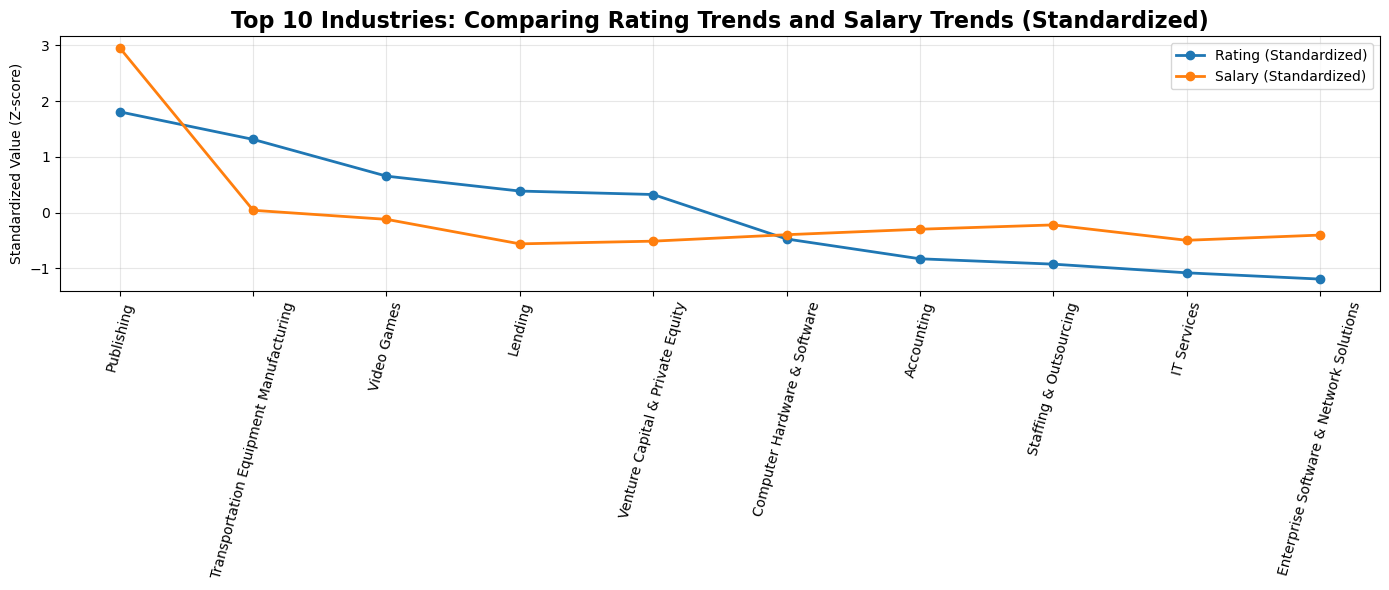

In [154]:
from sklearn.preprocessing import StandardScaler

df2 = df[(df["Rating"] != "Unknown") & (df["Industry"] != "Unknown")].copy()
df2["Rating"] = pd.to_numeric(df2["Rating"])

industry_avg = df2.groupby("Industry")[["Rating", "Avg_salary"]].mean()

top10 = industry_avg.nlargest(10, "Rating").sort_values("Rating", ascending=False)

scaler = StandardScaler()
scaled = scaler.fit_transform(top10)
top10_scaled = pd.DataFrame(scaled, index=top10.index, columns=["Rating_scaled", "Salary_scaled"])

plt.figure(figsize=(14, 6))

plt.plot(top10_scaled.index, top10_scaled["Rating_scaled"], marker="o", label="Rating (Standardized)", linewidth=2)
plt.plot(top10_scaled.index, top10_scaled["Salary_scaled"], marker="o", label="Salary (Standardized)", linewidth=2)

plt.title("Top 10 Industries: Comparing Rating Trends and Salary Trends (Standardized)", fontsize=16, fontweight="bold")
plt.ylabel("Standardized Value (Z-score)")
plt.xticks(rotation=75)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Part 2 Conclusion: 
- <strong>High-rated industries don't necessarily correspond to high salaries.

For example, the Publishing and Transportation Manufacturing industries have very high ratings, but average salaries are moderate.

- <strong>Some industries with moderate ratings actually offer higher salaries.

For example, IT Services and Computer Hardware & Software offer higher salaries but have slightly lower ratings.

 That leads to the next section: Does there exist a simple positive correlation between salary and satisfaction?

- <strong>Small rating variations (almost all between 4 and 4.8), but significant salary differences.

 This suggests that salary is influenced by job role and region more than reputation.

## Part 3 — Geographical Insights

Career opportunities can vary dramatically depending on the region.

Therefore, my third analytical question is:
<strong>“How do job salaries vary across different locations?”

Analyzing regional patterns helps job seekers understand:

- Which places tend to offer higher salaries?

- Whether certain cities or countries more competitive?

- How should location factor into career decisions?

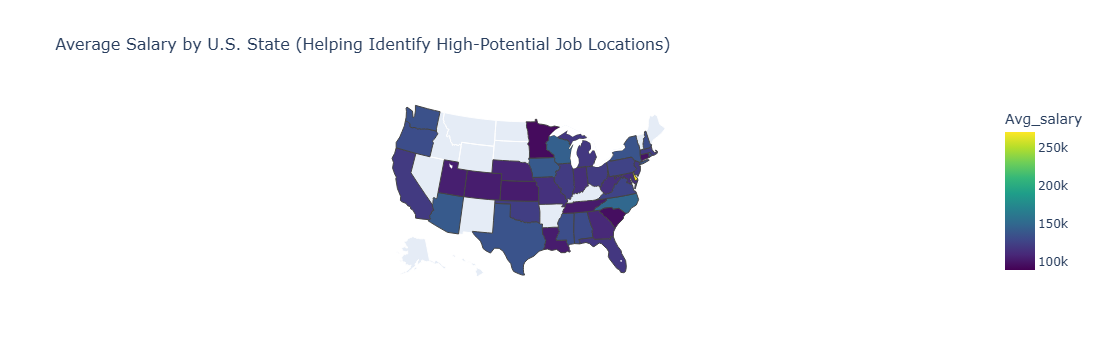

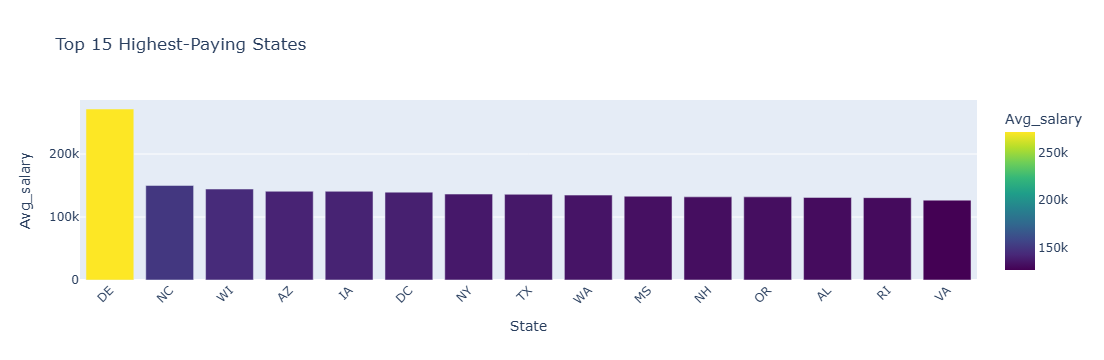

In [131]:
import plotly.express as px

df['State'] = df['Location'].str.split(',').str[1].str.strip()

state_salary = df.groupby('State')['Avg_salary'].mean().reset_index()

fig = px.choropleth(
    state_salary,
    locations='State',
    locationmode="USA-states",
    color='Avg_salary',
    scope="usa",
    color_continuous_scale="Viridis",
    title='Average Salary by U.S. State (Helping Identify High-Potential Job Locations)'
)

fig.update_layout(title_font_size=16)
fig.show()

# --------------------------- TOP STATES BAR CHART
fig_bar = px.bar(
    state_salary.nlargest(15, 'Avg_salary'),
    x='State',
    y='Avg_salary',
    title='Top 15 Highest-Paying States',
    color='Avg_salary',
    color_continuous_scale='Viridis'
)

fig_bar.update_layout(
    xaxis_tickangle=-45,
    showlegend=False
)

fig_bar.show()


# 5. Final Analysis Question

Based on these explorations, the central question of my final analysis is:

“How can salary, industry ratings, and geographical differences be used to guide data science students in choosing better career opportunities?”

All three parts of my analysis contribute to answering this question.

# 6. Conclusion:
Through this project, I created a data-driven guide for individuals—especially new graduates—who are exploring their future career options in the data science field.

My findings highlight that:

- <strong>Job roles show clear salary differentiation

The salary distribution analysis reveals that <strong>technical and specialized roles</strong>, such as Machine Learning Engineer, Data Scientist, and Software Engineer (Data), consistently offer higher earning potential. Meanwhile, roles with broader scopes—such as Data Analyst or generic Analyst positions—tend to cluster in a lower salary range.
This indicates that job seekers who want to maximize their earning potential may benefit from focusing on <strong>high-skill, high-specialization roles.

- <strong>High company ratings do not always match high salaries

Industry analysis shows a surprising insight:
Industries with the highest employee ratings—such as Publishing or Transportation Equipment Manufacturing—<strong>do not</strong> necessarily offer the highest salaries.
Conversely, some industries with modest ratings still offer comparatively higher salaries.

<strong>This suggests that salary and workplace satisfaction may not follow the same trend</strong>, and job seekers need to balance financial goals with workplace culture considerations.

- <strong>Geographic patterns show strong regional salary differences

When examining salaries across U.S. states, clear patterns emerge:
Some states consistently offer higher salaries, forming “hot spots” for data-related career growth. These locations are appealing for candidates focused on maximizing income, while lower-salary states may still be attractive when considering cost-of-living or lifestyle factors.

- <strong>Bringing all insights together

Across these three analytical dimensions, a consistent theme emerges:
<strong>Career decisions in data-related fields depend on multiple interacting factors—not just salary alone.

Someone motivated purely by earnings may target specific <strong>high-pay roles in high-pay states</strong>, regardless of industry rating.

Candidates who <strong>value workplace satisfaction</strong> may prioritize <strong>high-rated industries</strong>, even if salary is not the highest.

Those unsure of direction can use this analysis as a starting point to clarify their priorities and match them to the landscape revealed in the data.

<strong>Final takeaway

This project demonstrates that job seekers in the data science domain face a complex decision landscape. By combining salary patterns, company ratings, and geographic insights, this analysis provides a more complete and practical understanding of where opportunities exist and how individuals can make informed decisions about their career paths.

##### Realistic Plan:
- cleaning done at 2025-11-19
- visualization done at 2025-11-20
- summary and conclusion done at 2025-11-22
- formatting done at 2025-11-24
- story analysis done at 2025-11-26